In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
import sys
sys.path.insert(0, './modules')
from helpers import import_data, plot_stacked_bar

## Import Data

In [4]:
kiva = import_data('kiva_loans.csv', file_format='csv')
kiva.head()

Reading in the kiva_loans.csv dataset
Dataset has 7988 instances and 7 columns.
It has 1096 duplicated entries.

Column names:
Index(['status', 'sector', 'en', 'country', 'gender', 'loan_amount',
       'nonpayment'],
      dtype='object')

Missing values:
status           0
sector           0
en             106
country          0
gender           0
loan_amount      0
nonpayment       0
dtype: int64


,status,sector,en,country,gender,loan_amount,nonpayment
0,defaulted,Agriculture,<i>This description is written by Rowland Amul...,Kenya,M,500.0,lender
1,defaulted,Food,<i>This description is written by Rowland Amul...,Kenya,F,500.0,lender
2,defaulted,Food,<i>This description was written by Richard Maz...,Kenya,M,500.0,lender
3,defaulted,Services,<i>This description was written by Rowland Amu...,Kenya,F,500.0,lender
4,defaulted,Construction,<i>This description was written by Rowland Amu...,Kenya,M,500.0,lender


There are 1096 duplicates entries. We need to drop them.

In [5]:
kiva.drop_duplicates(inplace=True)

There are also 106 missing values from variable 'en', which is the description of loans. Since our task is to predict loan default with NLP and the missing percentage is not significant, let's drop those instances too.

In [6]:
kiva.dropna(inplace=True)

Examine the shape of the new dataset.

In [8]:
kiva.shape

(6818, 7)

## Exploratory Data Analysis

In [22]:
# Define global plotting parameters
plt.style.use('seaborn-white')
plt.rc('axes.spines', top=False, right=False)
plt.rc('axes', labelsize=15, labelpad=10, titlesize=20)
plt.rc('xtick', labelsize=13) 
plt.rc('ytick', labelsize=13)
plt.rc('legend', fontsize=13)

# Define custom palette that aligns with Kiva's corp color book
kiva_pal = ["#549E39", "#8AB833", "#C0CF3A", "#029676", "#A6A6A6"]

#### First, let's look at the distribution of the target variable.

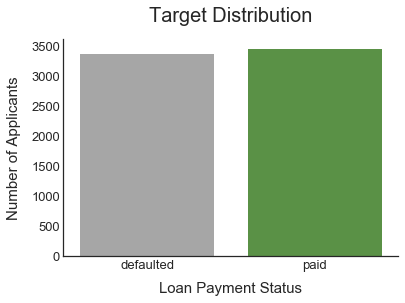

In [45]:
sns.countplot(x='status', data=kiva, palette=kiva_pal[-1:-6:-4])
plt.xlabel('Loan Payment Status');
plt.ylabel('Number of Applicants');
plt.title('Target Distribution', y=1.05);

#### Next, let's explore the target distribution by each feature.

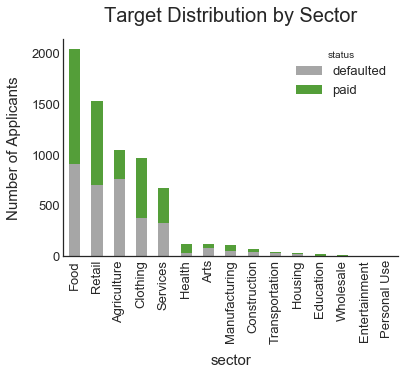

In [46]:
plot_stacked_bar(kiva, 'sector', 'status');
plt.ylabel('Number of Applicants');
plt.title('Target Distribution by Sector', y=1.05);

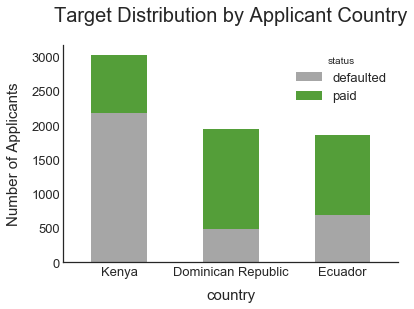

In [47]:
plot_stacked_bar(kiva, 'country', 'status')
plt.xticks(rotation=0);
plt.ylabel('Number of Applicants');
plt.title('Target Distribution by Applicant Country', y=1.08);

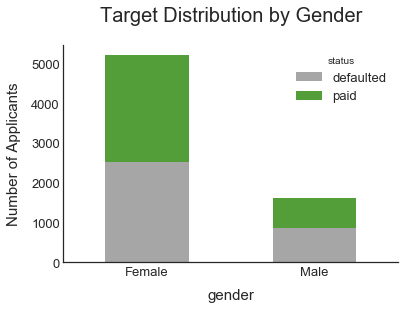

In [48]:
plot_stacked_bar(kiva, 'gender', 'status')
plt.xticks(np.arange(2), ('Female', 'Male'), rotation=0);
plt.ylabel('Number of Applicants');
plt.title('Target Distribution by Gender', y=1.08);

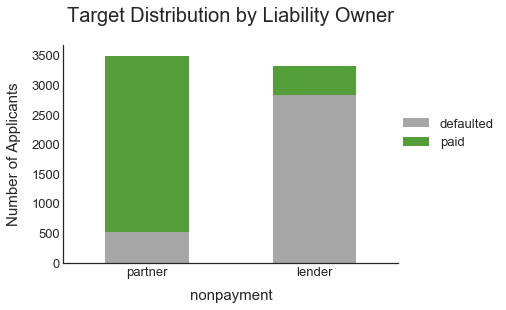

In [52]:
plot_stacked_bar(kiva, 'nonpayment', 'status')
plt.xticks(rotation=0);
plt.ylabel('Number of Applicants');
plt.title('Target Distribution by Liability Owner', y=1.08);
plt.legend(loc=(1, 0.5));

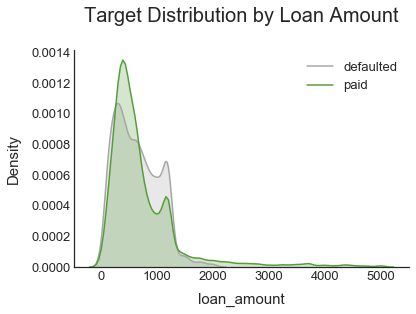

In [43]:
status = tuple(kiva_raw['status'].unique())
colors = tuple(kiva_pal[-1:-6:-4])


for s, c in zip(status, colors):
    subset = kiva_raw.loc[kiva_raw['status'] == s, 'loan_amount']
    sns.distplot(subset, hist=False,
                 kde_kws={'shade': True},
                 label=s,
                 color=c)
plt.ylabel('Density');
plt.title('Target Distribution by Loan Amount', y=1.1);

Liability Owner ('nonpayment') and Applicant Country ('country') seem to have the most explanatory power.

## Export Cleaned Dataset for Further Analysis

In [ ]:
# Make a directory to hold derived datasets
!mkdir -p derived_data

# Write cleaned kiva data to csv so we can load it into the next notebook
kiva.to_csv('derived_data/train_data_merged_2016.csv', index=False)